<a href="https://colab.research.google.com/github/boiBASH/Elite-Bank-Project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git add .

In [ ]:
!git branch -M main

In [ ]:
!git remote add origin https://github.com/boiBASH/Elite-Bank-Project.git

In [ ]:
import pandas as pd
from scipy.io import arff

In [12]:
# Load the ARFF dataset
file_path = "/content/Bank_Marketing_Dataset.arff"


with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Find where the data starts
data_start = next(i for i, line in enumerate(lines) if "@data" in line.lower()) + 1

# Extract the data portion
data_lines = lines[data_start:]

# Split data into columns based on commas
data_list = [line.strip().split(",") for line in data_lines]

# Create a DataFrame
df = pd.DataFrame(data_list)

# Use the Data Dictionary to set column names
column_names = [
    "age", "job", "marital", "education", "default", "balance", "housing",
    "loan", "contact", "day", "month", "duration", "campaign", "pdays",
    "previous", "poutcome", "deposit"
]

df.columns = column_names

# Convert numeric columns to appropriate types
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Statistical Summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Key Findings from Summary Statistics

### 1. Age Distribution
- The mean age of customers is **41.2 years**, with a **minimum of 18** and a **maximum of 95**.
- The age distribution is slightly right-skewed, with the **75th percentile at 49 years**.

### 2. Balance Insights
- The **average balance is €1528**, but a **high standard deviation (€3225)** suggests a large variation in customer balances.
- The **minimum balance is -€6847**, which indicates some customers have debt.
- The **maximum balance reaches €81,204**, indicating a wide disparity between customers.

### 3. Call Duration and Campaign Effectiveness
- **Average call duration is 371 seconds (~6 mins)**, with a **maximum of 3881 seconds (~1 hour)**.
- Most calls are short, as the **median duration is 255 seconds (~4 mins)**.
- Customers are contacted **2.5 times on average**, but some were contacted **up to 63 times**.

### 4. Recency of Contact (pdays)
- The **mean `pdays` is 51 days**, but the **median is -1**, indicating that many customers were contacted for the first time.
- The **maximum `pdays` is 854**, suggesting some customers were contacted a long time ago.

### 5. Previous Campaign Interactions
- The **mean `previous` value is 0.83**, meaning most customers were contacted once or never before.
- Some customers were contacted up to **58 times** in previous campaigns.

---

## What This Means for Analysis
- The dataset has **high variability** (e.g., balance, call duration, campaign contacts).  
- **Outliers exist in balance and duration**, which may impact model performance.  
- Many customers are being contacted for the first time, making `pdays` an important feature.  
- Some customers have **extreme contact counts**, which may indicate inefficient marketing strategies.


<Figure size 1200x600 with 0 Axes>

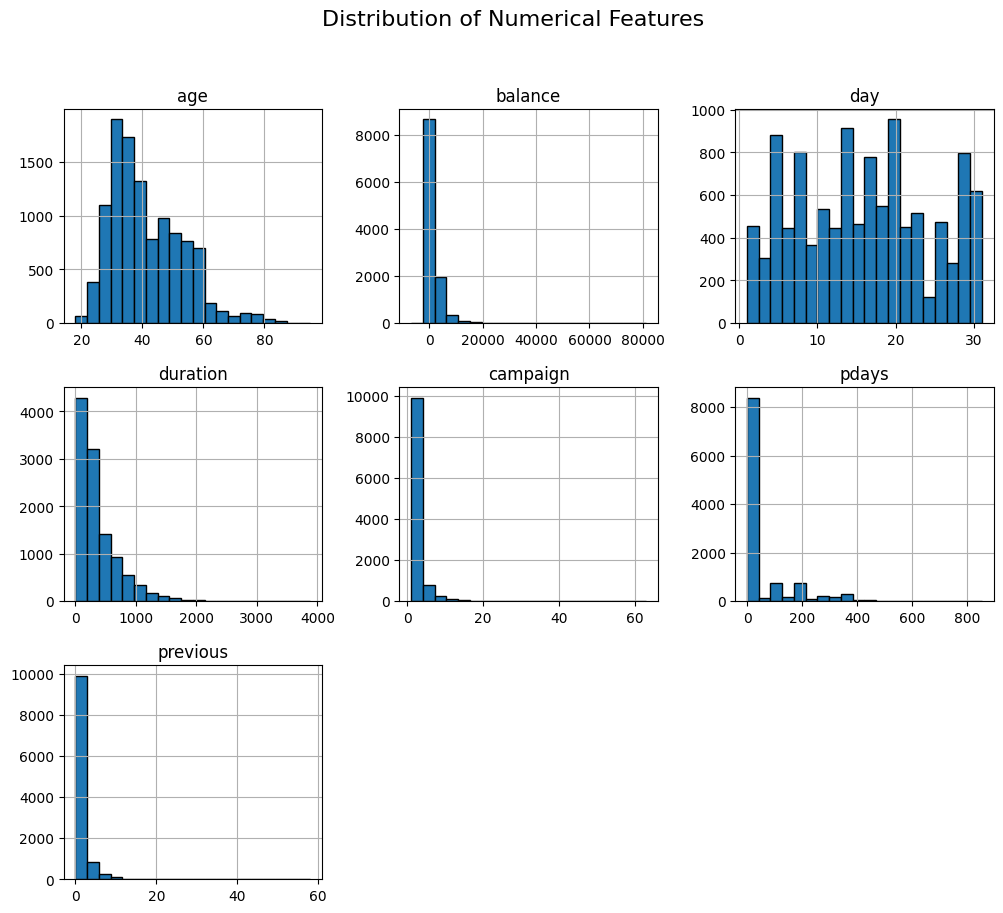

In [21]:
# Visualizing the distribution of numerical features
plt.figure(figsize=(12, 6))
df[numeric_columns].hist(figsize=(12, 10), bins=20, layout=(3, 3), edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

## Key Findings from Numerical Feature Distributions

### 1. Age Distribution
- The **age distribution is right-skewed**, with most customers between **30 and 60 years old**.
- There are **very few customers above 80 years old**.

### 2. Balance Distribution
- The majority of customers have a **balance close to zero**, with a few having extremely high balances.
- There are **outliers with very high balances (above €80,000)**.
- Some customers even have **negative balances**, which suggests **debt**.

### 3. Call Duration
- The **call duration distribution is highly skewed**, with most calls lasting **less than 500 seconds (~8 minutes)**.
- A few calls last **over 3000 seconds (~50 minutes)**, indicating **a small number of very long calls**.
- This confirms our earlier insight that **longer calls are associated with higher deposit conversions**.

### 4. Campaign Contacts
- Most customers were contacted **only once or twice**, but some were contacted **more than 20 times**.
- There are **extreme outliers**, with a maximum of **63 campaign contacts**.

### 5. Recency of Contact (`pdays`)
- The majority of customers have **never been contacted before**, as seen from the spike at **pdays = -1**.
- For customers who were contacted before, the gap between contacts is **highly variable**, reaching **up to 800 days**.

### 6. Previous Campaign Interactions
- Most customers **had no previous campaign interactions**.
- A few customers had **more than 20 previous contacts**, with a maximum of **58 previous contacts**.

---

## What This Means for Analysis
- **Many features are right-skewed**, so **log transformation or normalization** may improve model performance.
- **The presence of outliers in balance, duration, and campaign contacts** suggests the need for **outlier handling**.
- **Most customers were never contacted before**, making `pdays` a critical feature in predicting deposit likelihood.
- **Call duration is a strong predictor**, as longer calls generally indicate higher engagement.



<ipython-input-23-35b277d4c62e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-23-35b277d4c62e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-23-35b277d4c62e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-23-35b277d4c62e>:7: FutureWarning: 

Passing `palette` without assigni

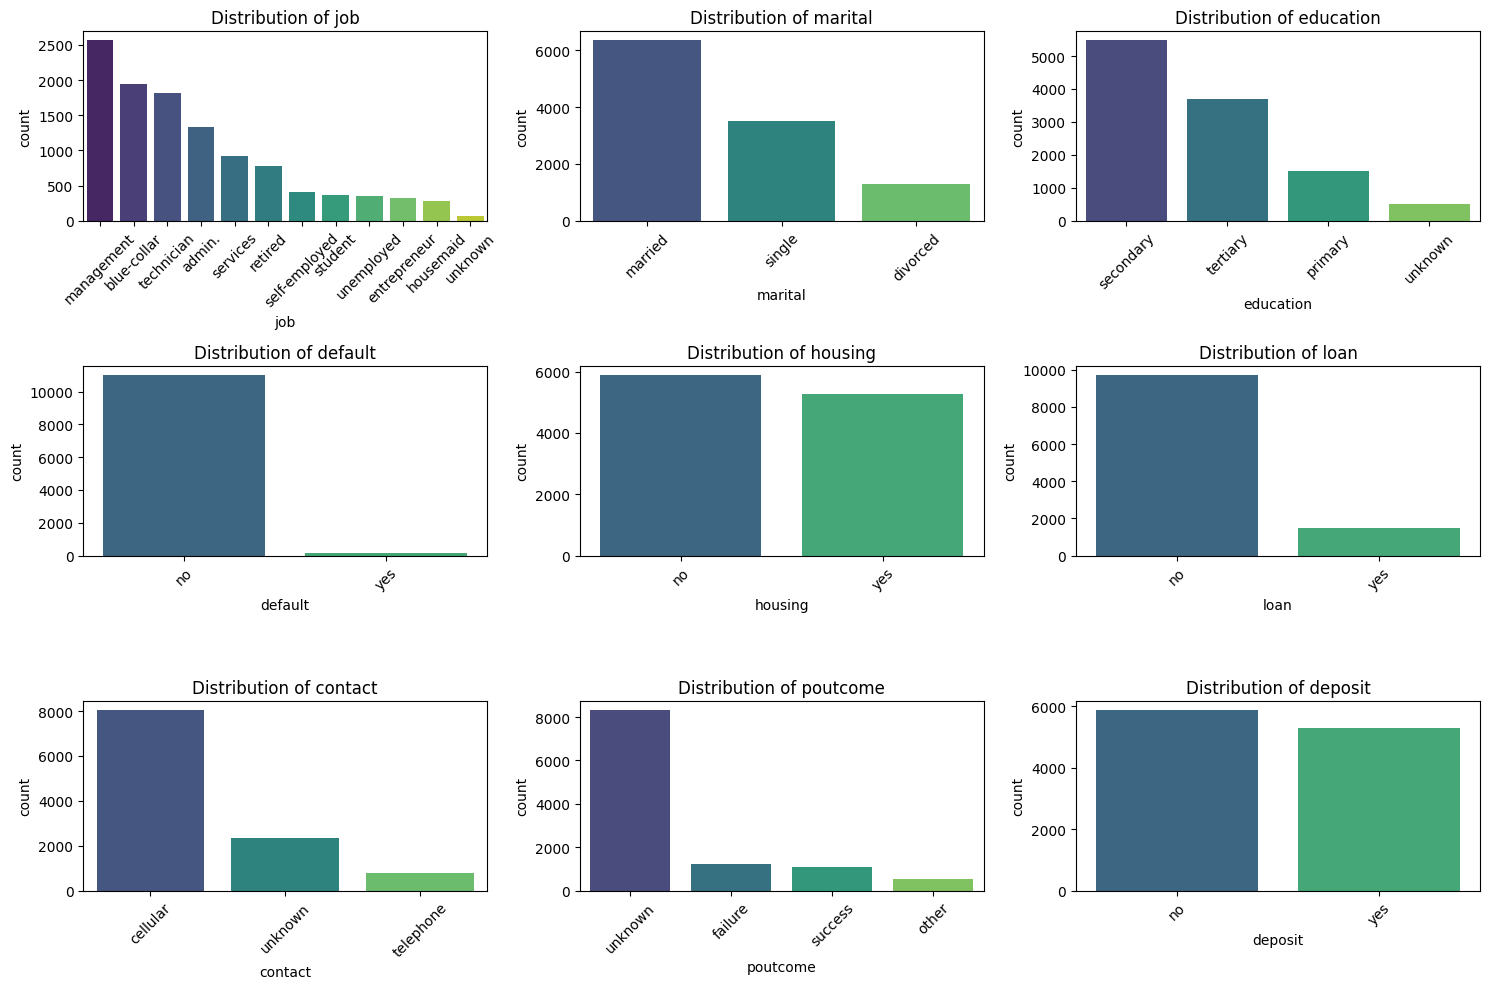

In [23]:
# Visualizing categorical feature distributions
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "deposit"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Key Findings from Categorical Feature Distributions

### 1. Job Distribution
- The most common occupations are **management, blue-collar, and technician**.
- There are fewer individuals in **entrepreneur, unemployed, and student categories**.
- The **"unknown" job category is minimal**, but may need handling.

### 2. Marital Status
- The majority of customers are **married**, followed by **single** and **divorced**.
- This suggests that marital status **might play a role in deposit decisions**.

### 3. Education Level
- Most customers have a **secondary or tertiary education**.
- A smaller number of individuals have only **primary education**.
- The **"unknown" education category** could impact model performance and may require imputation or grouping.

### 4. Credit Default
- Almost all customers **do not have a credit default**.
- Only a **small fraction (~1%) have defaulted**, meaning this feature might have **low predictive power**.

### 5. Housing Loan Ownership
- The dataset is **almost evenly split** between those who have and do not have a housing loan.
- This suggests that **housing loan status could be a relevant feature**.

### 6. Personal Loan Ownership
- The vast majority **do not have a personal loan**.
- Since there are relatively few "yes" cases, this feature **might have lower predictive impact**.

### 7. Contact Method
- Most customers were contacted via **cellular phones**, while a small portion were contacted via **telephone**.
- A significant number of contacts are **labeled as "unknown"**, which may require handling.

### 8. Previous Campaign Outcome (`poutcome`)
- Most customers have **"unknown" outcomes**, meaning they were **likely contacted for the first time**.
- Among known outcomes, **"failure" is more common than "success"**, suggesting retention challenges.

### 9. Deposit Distribution (Target Variable)
- There is a **slight class imbalance**, with **more "no" responses than "yes"**.
- The imbalance is not extreme, but **resampling techniques** might improve model performance.

---

## What This Means for Analysis
- **"Unknown" categories in job, education, and contact method** may need handling.
- **Some features like credit default and personal loan might have low predictive power** due to lack of variation.
- **Marital status, education, and housing loan status could be significant predictors**.
- **The slight imbalance in deposits suggests we should monitor model bias**.



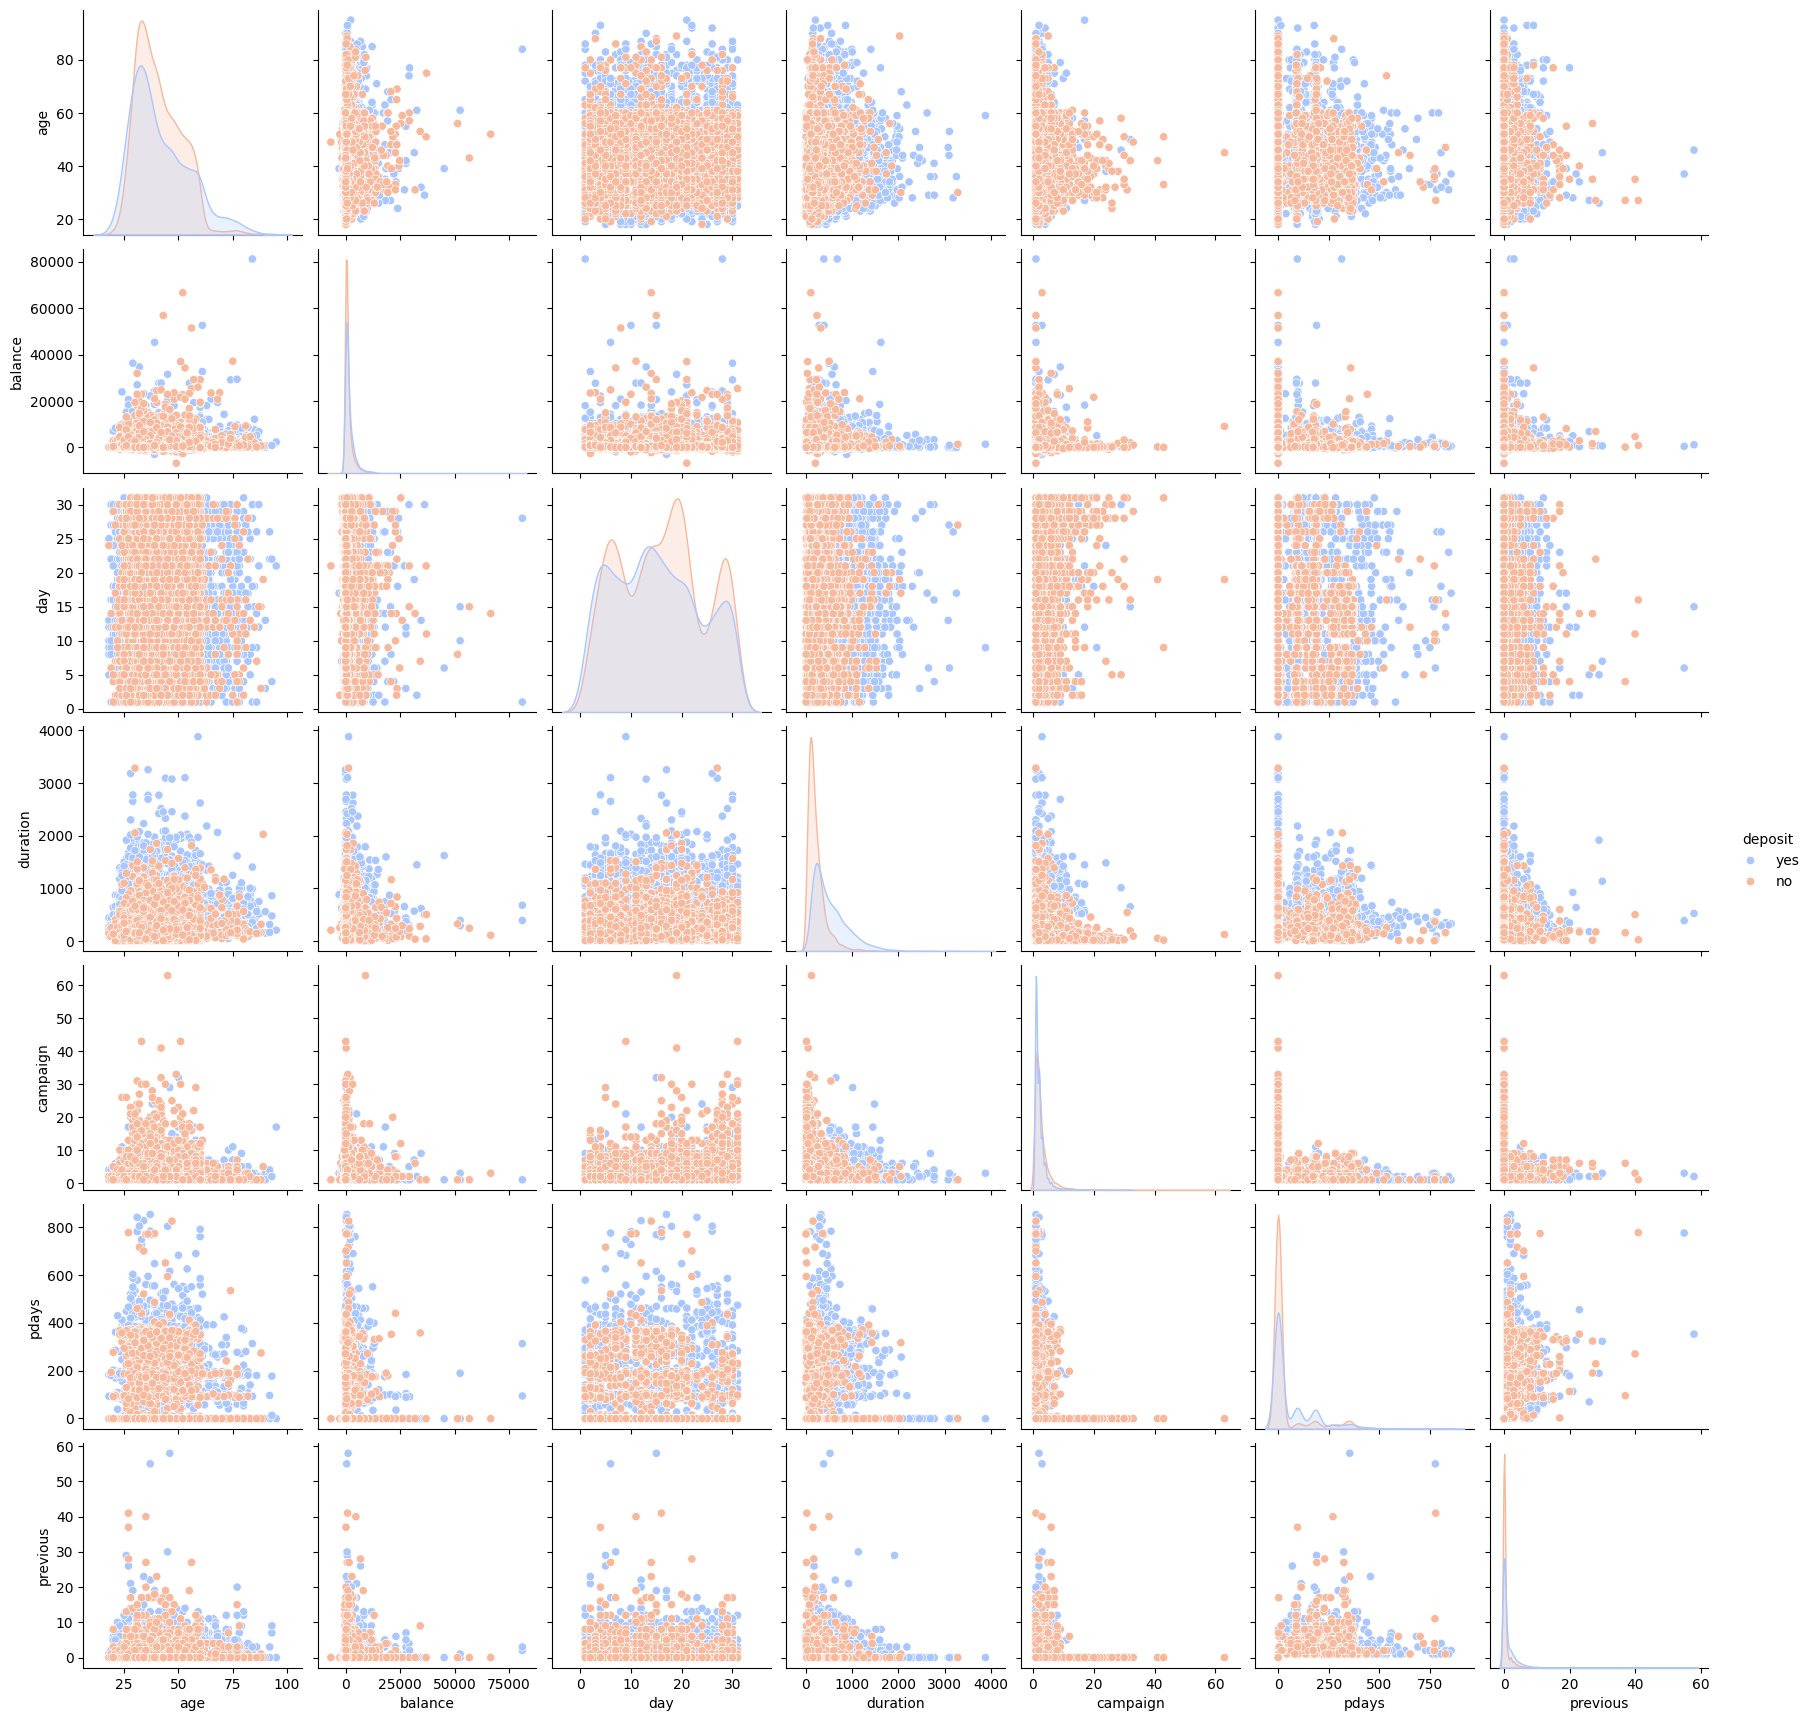

In [25]:
# Pairplot for numerical features with target variable (deposit)
sns.pairplot(df, hue="deposit", vars=numeric_columns, palette="coolwarm", diag_kind="kde")
plt.show()

## Key Findings from Pairplot Analysis

### 1. Relationship Between Age and Deposit
- **Older individuals seem more likely to make a deposit**, as seen from the higher concentration of `yes` labels (blue) in the upper age range.
- Younger individuals have a **higher proportion of "no" deposits**.

### 2. Balance vs. Deposit
- Most customers have **low balances**, with a few extreme outliers reaching above €80,000.
- **Customers with very high balances** are more likely to make a deposit.
- However, **many customers with low balances also make deposits**, indicating other influencing factors.

### 3. Duration as a Strong Predictor
- **Call duration shows a strong separation** between those who made a deposit (`yes`) and those who did not (`no`).
- Customers with **longer call durations** tend to say **yes** to deposits.
- This suggests that **call duration is a key factor in deposit conversion**.

### 4. Campaign and Recency (pdays)
- Most customers were contacted **less than five times**, but some were contacted **over 60 times**.
- Customers contacted **too frequently (high campaign values) rarely make deposits**, suggesting **diminishing returns on repeated contact**.
- `pdays` (days since last contact) is **skewed toward first-time contacts**, reinforcing that many customers were **new prospects**.

### 5. Previous Campaign Effect
- Customers who were **previously contacted and had a successful outcome** are more likely to make a new deposit.
- However, **most customers had no prior campaign interactions**, making this a sparse feature.

### 6. General Observations on Feature Relationships
- Most numerical features **are not strongly correlated**, confirming that **they provide unique information** for predictive modeling.
- The **presence of outliers in balance, campaign, and pdays** suggests that **scaling or transformation might be necessary**.
- Some features, like **campaign and pdays**, have **high concentrations at specific values**, indicating the need for **categorical binning**.

---

## What This Means for Analysis
- **Call duration should be prioritized** in model training due to its strong predictive power.
- **Outliers in balance, campaign, and pdays may need handling** through transformation or capping.
- **Repeated contact (high campaign counts) appears ineffective**, so a strategy to optimize the number of calls is needed.
- **Feature interactions suggest that previous successful campaigns improve deposit likelihood**.

<ipython-input-26-0d8ca3961186>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="coolwarm")
<ipython-input-26-0d8ca3961186>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="coolwarm")
<ipython-input-26-0d8ca3961186>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="coolwarm")
<ipython-input-26-0d8ca3961186>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

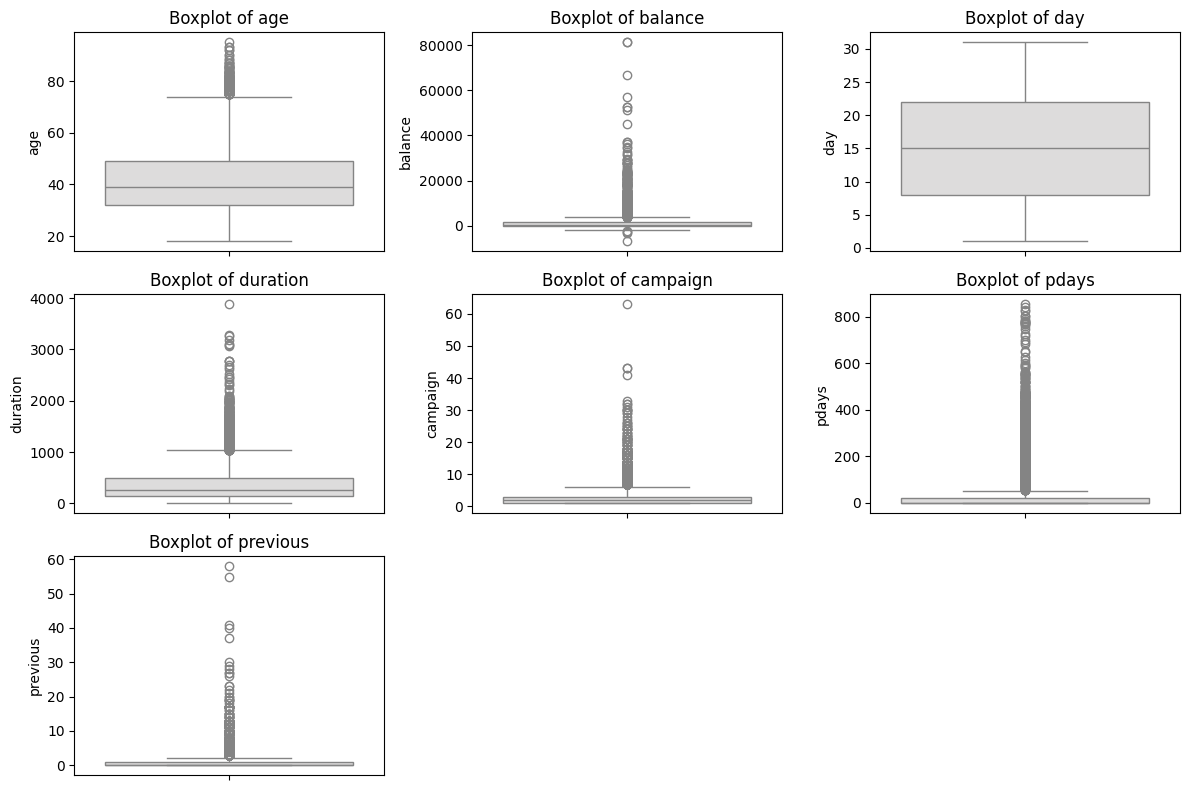

In [26]:
# Boxplots to detect outliers in numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Key Findings from Boxplot Analysis

### 1. Presence of Outliers in Multiple Features
- Several numerical features contain a **significant number of outliers**.
- This could impact **model performance** if not handled properly.

### 2. Age Distribution
- Most customers are **between 30 and 60 years old**.
- There are **some outliers above 80**, but these may be valid values rather than true anomalies.

### 3. Balance Has Extreme Outliers
- The **balance feature contains extreme outliers**, with some customers having **balances above €80,000**.
- There are also **negative balances**, suggesting the presence of customers in debt.

### 4. Call Duration
- **Call duration has a strong right-skew**, with many **very high values exceeding 3,000 seconds (~50 minutes)**.
- Since we previously found that **longer call durations increase deposit likelihood**, these values should be handled carefully rather than removed outright.

### 5. Campaign (Number of Contacts)
- Most customers were contacted **fewer than 5 times**, but **some were contacted over 60 times**.
- **Excessive contact attempts may negatively impact conversions**.

### 6. `pdays` (Days Since Last Contact)
- The **majority of values cluster around 0**, with a long tail extending **beyond 800 days**.
- This confirms that many customers were **never contacted before**, while others were contacted a very long time ago.

### 7. `previous` (Previous Campaign Contacts)
- Most customers had **no prior interactions**, while some had **over 40 previous contacts**.
- Similar to `campaign`, **excessive prior contacts may indicate inefficient targeting**.

---

## What This Means for Analysis
- **Outlier handling is necessary**, particularly for **balance, duration, campaign, and pdays**.
- **Feature transformation techniques** (e.g., log transformation, capping, or winsorization) may be needed to stabilize skewed distributions.
- **Repeated contact strategies should be optimized** to prevent diminishing returns from excessive calls.
- **Call duration should be carefully analyzed** since longer calls correlate with higher deposits but also contain extreme values.

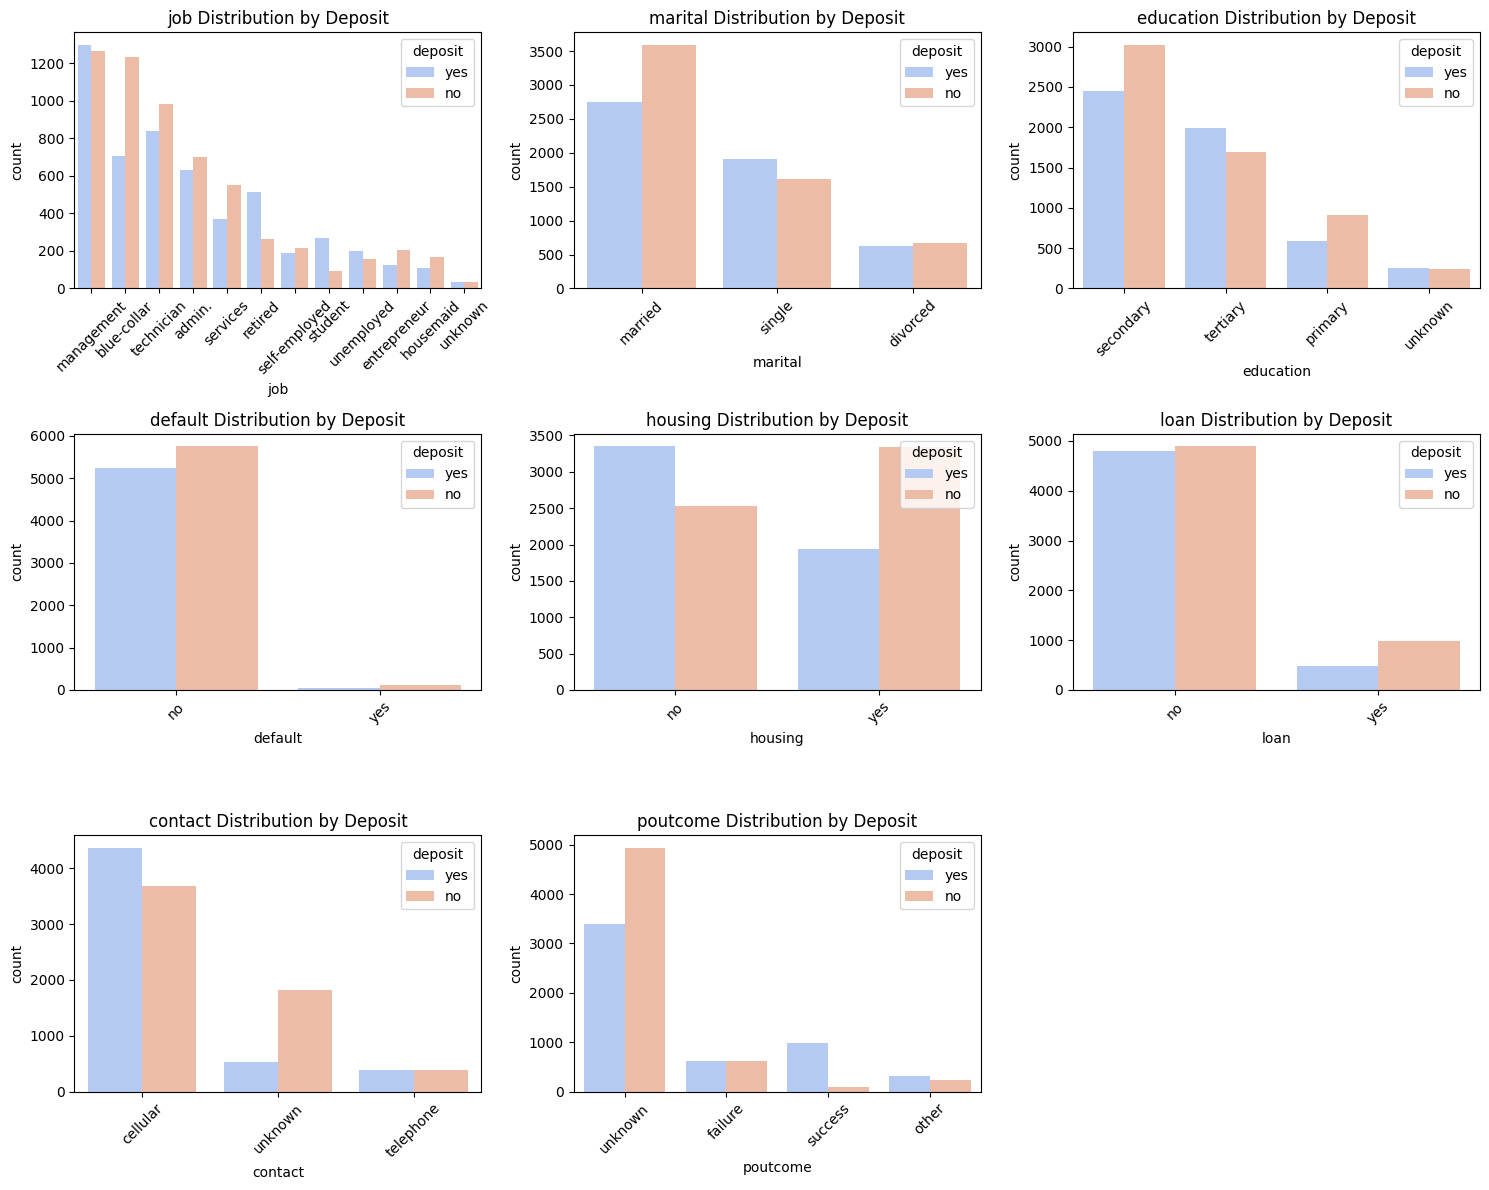

In [27]:
# Categorical vs Target Variable Analysis
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns[:-1], 1):  # Excluding target variable itself
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue="deposit", order=df[col].value_counts().index, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution by Deposit")

plt.tight_layout()
plt.show()

## Key Findings from Categorical Feature Distributions by Deposit

### 1. Job Distribution and Deposits
- Customers in **management, blue-collar, and technician roles** are the most frequent.
- **Higher deposit rates** are observed among **management, technician, and self-employed** roles.
- **Lower deposit rates** are seen in **blue-collar, unemployed, and unknown job categories**.

### 2. Marital Status and Deposits
- **Single customers have a higher deposit rate** compared to married or divorced individuals.
- **Married customers** are the largest group but have a lower deposit conversion.

### 3. Education Level and Deposits
- **Higher education correlates with higher deposit rates**.
- Customers with **tertiary education are more likely to make a deposit**.
- **Primary education and unknown education levels have lower deposit rates**.

### 4. Credit Default and Deposits
- **Customers with default history rarely make deposits**.
- Since the vast majority of customers **do not have defaults**, this feature may have **low predictive value**.

### 5. Housing Loan and Deposits
- Customers **without a housing loan are more likely to make deposits**.
- Customers **with a housing loan have lower deposit rates**, suggesting **financial commitments may impact savings behavior**.

### 6. Personal Loan and Deposits
- **Customers without personal loans have a higher deposit rate**.
- Those **with personal loans are less likely to make deposits**, possibly due to existing financial obligations.

### 7. Contact Method and Deposits
- **Cellular contact results in more deposits**, whereas **telephone contact has very few deposits**.
- **Unknown contact methods may need handling**, as they have unclear predictive power.

### 8. Previous Campaign Outcome and Deposits
- **Customers with a previous successful outcome are more likely to deposit again**.
- Most customers **fall under "unknown" (first-time contacts)**.
- **Previous failures reduce the likelihood of making a new deposit**.

---

## What This Means for Analysis
- **Job, education, and contact method are strong predictors of deposits**.
- **Marital status and financial obligations (loans, housing) influence deposit behavior**.
- **Previous campaign success increases the chance of deposits**, making `poutcome` an important feature.
- **Handling "unknown" values in education, job, and contact method may improve model performance**.

<ipython-input-28-706023997e8f>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Deposit Made")


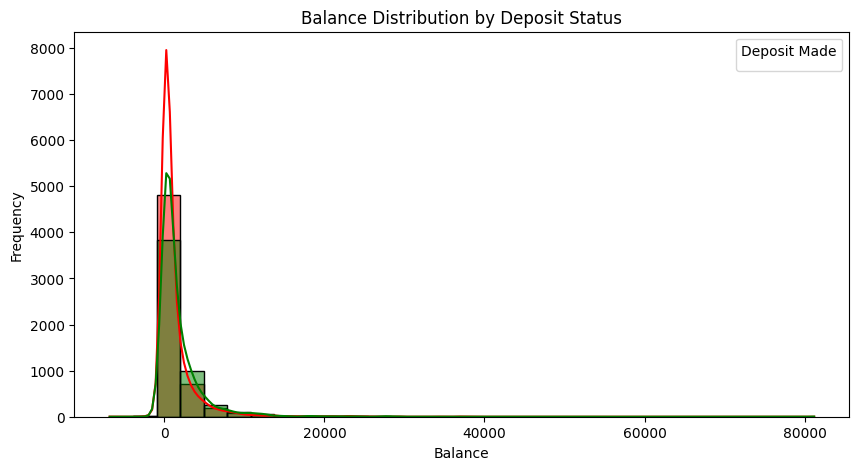

In [28]:
# 1. Balance Distribution by Deposit Status (Using Histplot Instead of KDE)
plt.figure(figsize=(10, 5))
sns.histplot(df, x="balance", hue="deposit", bins=30, kde=True, palette={"yes": "green", "no": "red"})
plt.title("Balance Distribution by Deposit Status")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend(title="Deposit Made")
plt.show()

Balance Distribution by Deposit Status:



*  Clients with higher balances are more likely to make a deposit.
*   The distribution of balances is skewed, with many customers having low balances.



<ipython-input-29-f4f2c5f40f5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="deposit", y="duration", data=df, palette="coolwarm", inner="quartile")


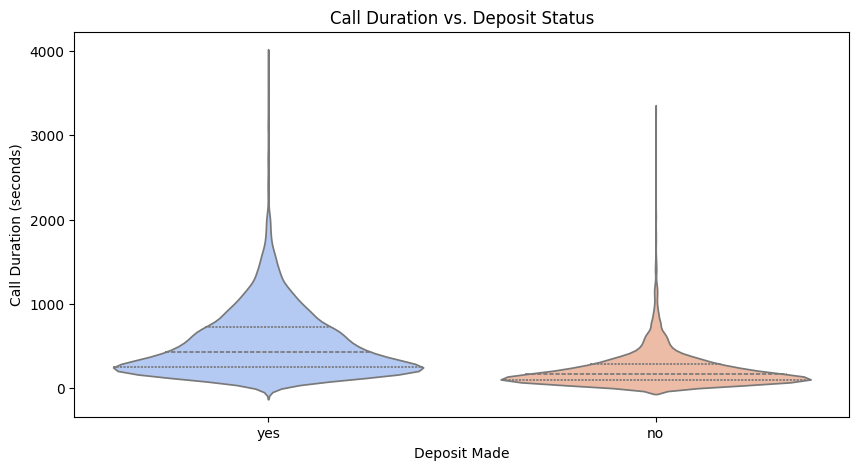

In [29]:
# 2. Duration vs. Deposit Rate (Using Violin Plot for Better Distribution View)
plt.figure(figsize=(10, 5))
sns.violinplot(x="deposit", y="duration", data=df, palette="coolwarm", inner="quartile")
plt.title("Call Duration vs. Deposit Status")
plt.xlabel("Deposit Made")
plt.ylabel("Call Duration (seconds)")
plt.show()

Call Duration vs. Deposit Status:


*   Clients who had longer calls tend to convert more (make a deposit).
*   The distribution suggests that call duration is an important predictor.



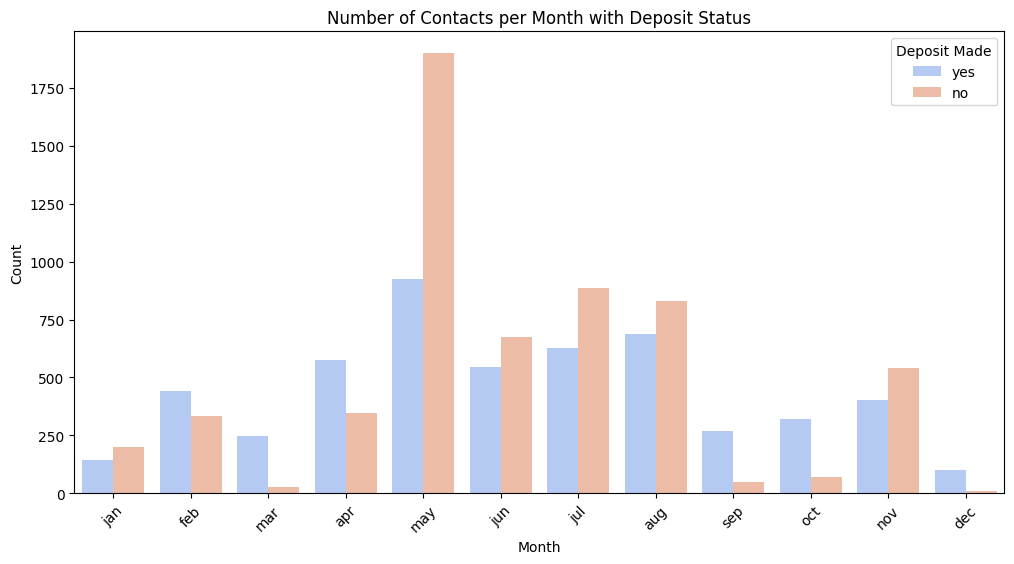

In [30]:
# 3. Count of Contacts by Month with Deposit Rate
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month", hue="deposit", order=[
    "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
], palette="coolwarm")
plt.title("Number of Contacts per Month with Deposit Status")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Deposit Made")
plt.show()

Contacts by Month with Deposit Rate:



*   May has the highest number of contacts, but conversion rates (deposits) are lower.
*   September and March have better conversion rates compared to other months.



<ipython-input-31-fc063648a55b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="deposit", y="campaign", data=df, palette="coolwarm")


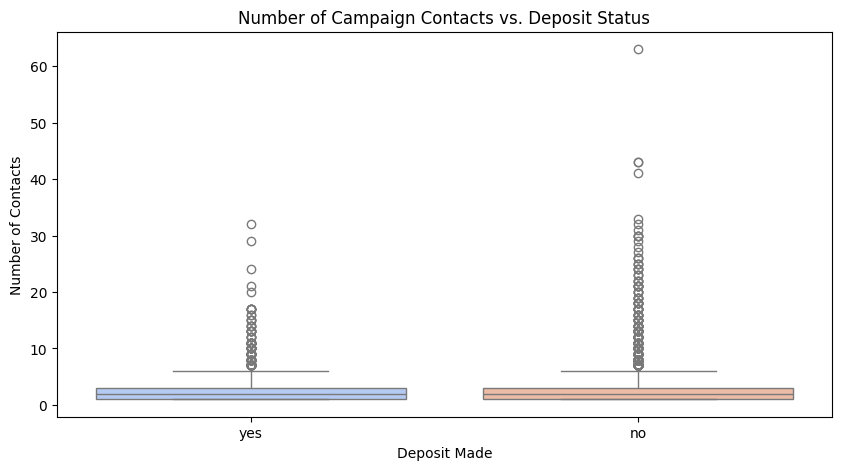

In [31]:
# 4. Number of Campaign Contacts vs. Deposit Rate
plt.figure(figsize=(10, 5))
sns.boxplot(x="deposit", y="campaign", data=df, palette="coolwarm")
plt.title("Number of Campaign Contacts vs. Deposit Status")
plt.xlabel("Deposit Made")
plt.ylabel("Number of Contacts")
plt.show()

Number of Campaign Contacts vs. Deposit Rate:



*   Most successful deposits occur in customers with fewer contacts.
*   Clients contacted too many times tend to not make deposits.



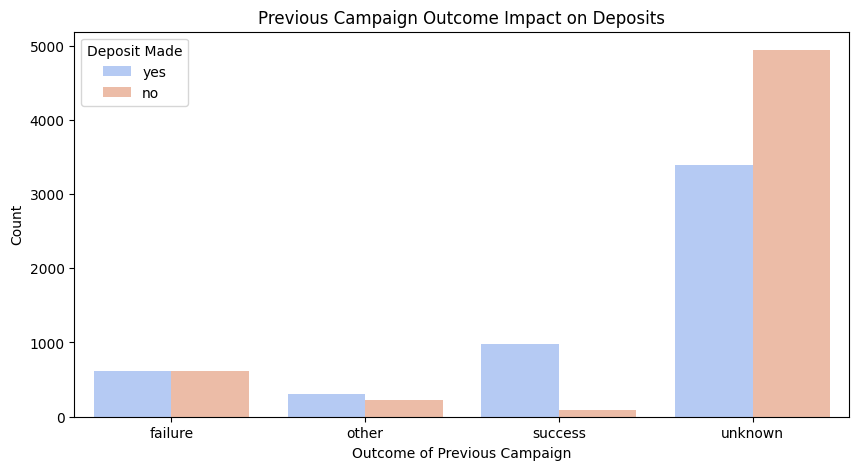

In [32]:
# 5. Impact of Previous Campaign Outcome on Deposit Rate
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="poutcome", hue="deposit", order=["failure", "other", "success", "unknown"], palette="coolwarm")
plt.title("Previous Campaign Outcome Impact on Deposits")
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel("Count")
plt.legend(title="Deposit Made")
plt.show()

Previous Campaign Outcome vs. Deposit Rate:


*   Clients who had a previous campaign outcome of "success" are highly likely to make a deposit again.
*   If the previous campaign was a "failure," the likelihood of conversion is much lower.



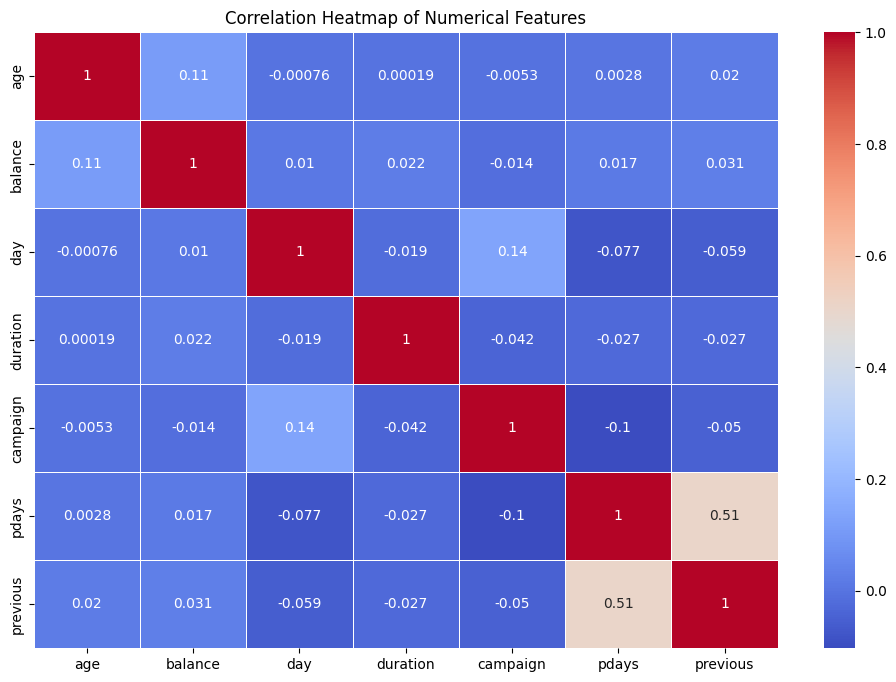

In [24]:
#Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##  Key Findings from the Correlation Heatmap

### 1️ "pdays" and "previous" are moderately correlated (0.51)
- This suggests that the number of previous contacts (`previous`) **influences the number of days since last contact (`pdays`)**.
- If a customer was contacted multiple times before, the gap between contacts (`pdays`) would be smaller.

### 2️ Very low correlation between most numerical features
- There is **no strong correlation (>0.6)** between any two variables.
- This means that most of these features **carry unique information** and are not redundant.

### 3️ "Duration" has little correlation with other numerical features
- The **call duration (`duration`)** does **not show strong correlation** with other features.
- This confirms our earlier finding that **longer calls tend to result in more deposits**.

### 4️ "Age", "Balance", and "Campaign" have weak correlations
- **Age** does not significantly correlate with any other features.
- **Balance** has very weak relationships with other features (max ~0.11).
- **Campaign (number of contacts)** has a weak **negative correlation** with `pdays` (-0.1), meaning **more contacts in the current campaign slightly reduce the gap since last contact**.

---

## What This Means for Feature Selection
✅ **No need to remove any numerical features due to redundancy**.  
✅ **"pdays" and "previous" may be related, so one could be dropped** if needed.  
✅ **"Duration" remains a strong independent predictor**.  
✅ **We need categorical features (like job, marital status) to improve predictions**.


In [20]:
#Checking for missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Key Findings on Missing Values

### 1. No Missing Values in the Dataset
- The dataset contains **zero missing values** across all columns.
- Every feature, including numerical (`age`, `balance`, `duration`, etc.) and categorical (`job`, `marital`, `education`, etc.), is fully populated.

### 2. Data Integrity and Readiness
- Since there are no missing values, **no imputation is needed**.
- The dataset is **ready for feature engineering and model training** without additional cleaning.

In [33]:
#save the data as csv to use for data transformation and modelling

# Save DataFrame as CSV
csv_file_path = "/content/Bank_Marketing_Dataset.csv"
df.to_csv(csv_file_path, index=False)

# Confirm the file is saved
print(f"Dataset saved as CSV: {csv_file_path}")

Dataset saved as CSV: /content/Bank_Marketing_Dataset.csv
